In [122]:
import pandas as pd
import numpy as np


## Pre cleaning the dataset in excel before loading
To ensure proper anlaysis and to decrease code complexity several unnecessary columns were removed from the original dataset. These columns either contained only missing values (NA) or had irrelevant data. This can be done using the drop function in code but this has been done in csv file since it increases code code complexity to point each column , and the updated CSV file now excludes these useless columns.

few colums are tot_cur_bal,open_acc_6m etc...


In [124]:
loan_data = pd.read_csv("loan.csv") 

In [125]:
loan_data.head() #gives 5 rows of data here we can see what are the final atribute remained in the data after removing few 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,Interest_Rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [126]:
#checking datatypes of the attributes 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   Interest_Rate            39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [127]:
#converted funded amount inv to integer type to maintain data consistency this has float values now all the values were in integer type
loan_data["funded_amnt_inv"] = loan_data["funded_amnt_inv"].astype("int")  


In [128]:
# The term attribute is having string values with month appended to the data so as per our analysis removed month and converted term to integer type
loan_data["term"] = loan_data["term"].str.replace("months","").astype("int") 
loan_data.term

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

In [129]:
#interest rate values are appended with % symbol and the type of data type id object, so here i have removed percentage from the values and convereted to float type
loan_data = loan_data.rename(columns= {"Interest_Rate":"Interest_Rate_perc"})
loan_data["Interest_Rate_perc"] = loan_data["Interest_Rate_perc"].str.replace("%","").astype("float") 

In [130]:
#loan_data.info()

#employee length which is employment years the column name is getting changed below as employment_yrs for readability
loan_data = loan_data.rename(columns= {"emp_length":"Employment_yrs"})

#the column has 1075 null values, so the below code removes na values from the columns
loan_data.isnull().sum() #up on checking initially for null values emp_length has  1075 null values
loan_data = loan_data[~(loan_data["Employment_yrs"].isnull())] #Removed the null values from the loan data
loan_data["Employment_yrs"] = (loan_data["Employment_yrs"].str.extract(r"(\d+)")).astype("int") #since the values we need are numerical and doesnt want any other character extracting the integer value and converting the column as integer type


In [131]:
loan_data["annual_inc"] = loan_data["annual_inc"].astype("int") #The annual income values are having few log values so converted this to integer type

In [132]:
#categorizing the loan status values to numerical indicating 0-2 values
Loan_status = {
    "Fully Paid": 1,
    "Charged Off": 0,
    "Default": 0,
    "Current":2
}

# Creating a new column with numerical categorization based on the mapping
loan_data["loan_status_num"] = loan_data["loan_status"].map(Loan_status)

print(loan_data[["loan_status", "loan_status_num"]].head()) #checking tha values

   loan_status  loan_status_num
0   Fully Paid                1
1  Charged Off                0
2   Fully Paid                1
3   Fully Paid                1
4      Current                2


In [133]:
#importing necessary packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns


Below, various plots were created to effectively visualize how specific columns in the dataset influenced loan statuses. These visualizations provide valuable insights into the relationships between borrower attributes and loan outcomes, helping to identify key factors driving defaults 

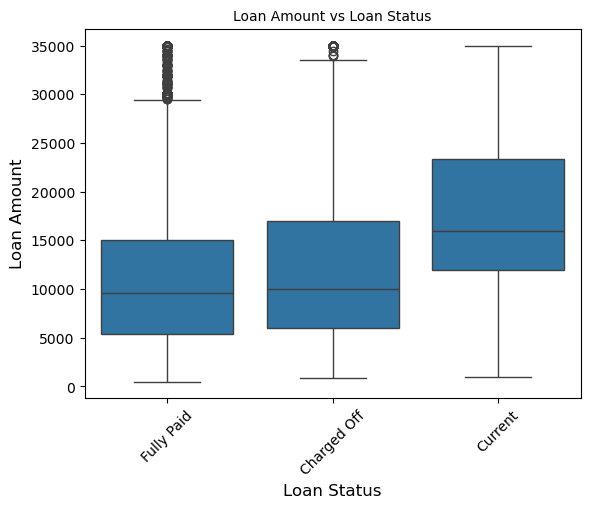

In [135]:
#the following code is to check the data distribution of loan amount and loan status on a box plot. this give a few insights howloan amount is impacting deafulters
sns.boxplot(x = loan_data["loan_status"], y = loan_data["loan_amnt"]) #barplot is been plotted with seaborn
plt.title("Loan Amount vs Loan Status", fontsize=10)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.xticks(rotation=45)
plt.show()

The graph above shows the overall distribution of loan statuses based on loan amounts. Fully paid loans are evenly distributed, with most being on the lower side. The data indicates that moderate loan amounts are more likely to be fully repaid. However, defaulted loans also fall within a similar range but have a slightly lower median. This suggests that even smaller loan amounts do not ensure repayment, as some borrowers still default.

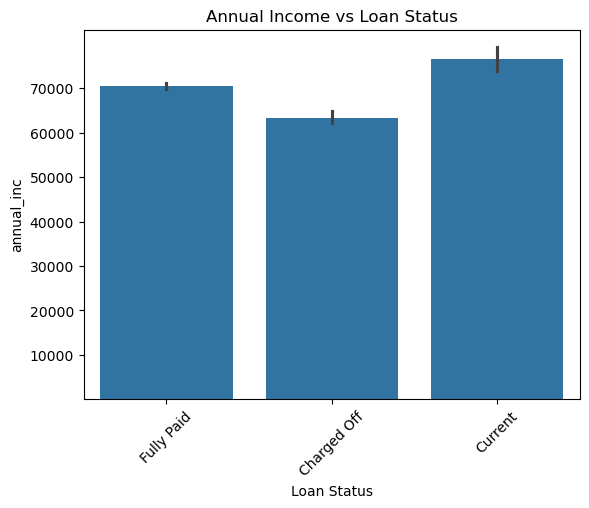

In [137]:
#the following code is to check the data distribution of annual income and loan status over a bar chart . this give a few insights how annual amount is impacting the loan status
sns.barplot(x = loan_data["loan_status"], y = loan_data["annual_inc"])
plt.title("Annual Income vs Loan Status", fontsize=12)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("annual_inc", fontsize=10)
plt.yticks(np.arange(10000, 80000, 10000))
plt.xticks(rotation=45)
plt.show()



The graph above illustrates a clear distinction between borrowers who fully repaid their loans and those who defaulted. Borrowers with higher annual incomes are significantly more likely to repay their loans compared to those with lower annual incomes. This suggests that annual income is a strong indicator of a borrower’s ability to meet repayment obligations.

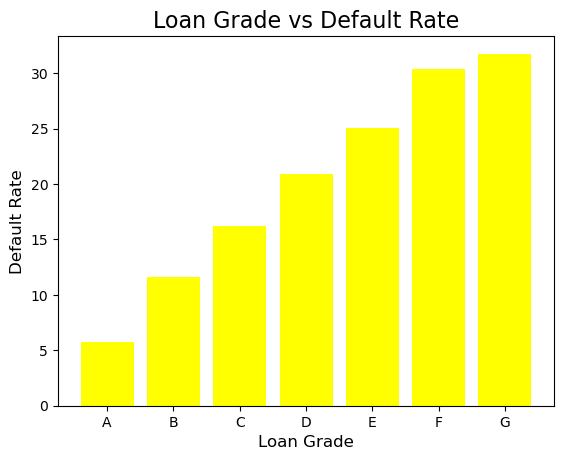

In [139]:
#graph to see the loan grade impact on default rate
charged_off_loans = loan_data[loan_data['loan_status'] == "Charged Off"] #here we are filtering the loan status data where only the borrowers are deafulted
charged_off_grade_counts = charged_off_loans['grade'].value_counts().sort_index() #counts the grades to get the how much each grade loans are defaulted and sorting in alphabetical order
total_loans_per_grade = loan_data['grade'].value_counts().sort_index() #counts the occurence of grade irrespective to the loan status
default_rate = (charged_off_grade_counts / total_loans_per_grade) * 100  # inorder to get the default rate we are diving for each grade the defaulted loans divided by total loans 
plt.bar(default_rate.index, default_rate.values, color="yellow")
plt.title("Loan Grade vs Default Rate", fontsize=16)
plt.xlabel("Loan Grade", fontsize=12)
plt.ylabel("Default Rate", fontsize=12)
plt.show()

The graph illustrates the relationship between loan grades and loan statuses. It reveals that lower-grade loans are associated with a significantly higher risk of default, highlighting the impact of loan grade on repayment behavior. Where G indicating Higherrisk and A low.

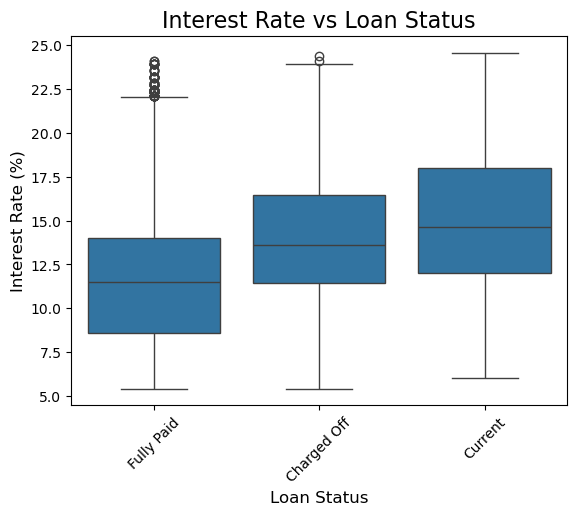

In [141]:
#Interest rate on which loan was funded vas loan status
sns.boxplot(x=loan_data["loan_status"], y=loan_data["Interest_Rate_perc"] )
plt.title("Interest Rate vs Loan Status", fontsize=16)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Borrowers who successfully repay their loans typically have lower interest rates, indicating that reduced rates may facilitate improved loan repayment. Conversely, defaulted loans are often associated with higher interest rates, which can impose additional financial strain and elevate the risk of default.

### OUTLIERS in State wise data

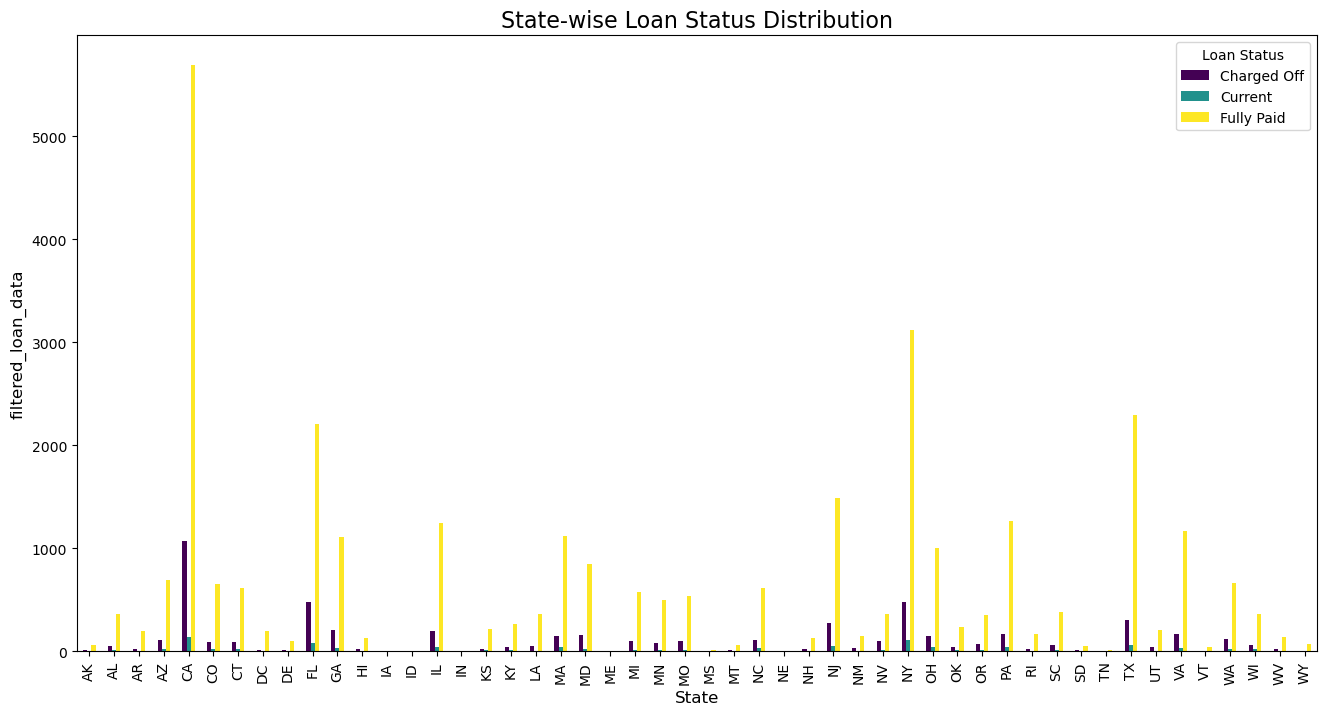

In [144]:
#here the state and loan status are grouped together so that we can use for the visualization by each category of loan status and the unstack makes a new table with grouped data
state_loan_status = loan_data.groupby(["addr_state", "loan_status"]).size().unstack(fill_value=0)  
state_loan_status.plot(kind="bar",figsize=(16, 8),colormap="viridis")
plt.title("State-wise Loan Status Distribution", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("filtered_loan_data", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Loan Status", fontsize=10)
plt.show()

#By plotting this graph we found few outliers which disrupting total distribution
#in the below graph we see that the states california CA, New York NY,FL and TX are outliers 

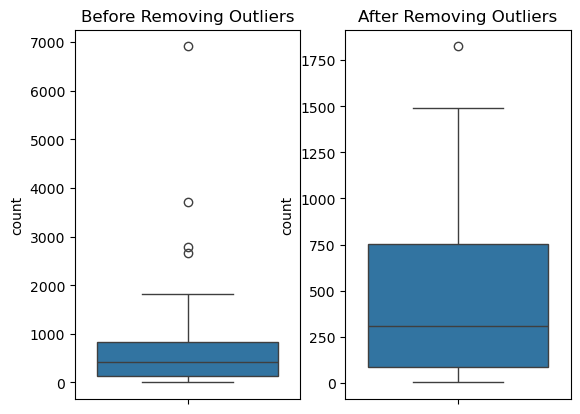

Outlier States: ['CA', 'NY', 'FL', 'TX']


In [145]:

#getting the count for the loan amounts per each state and getting the quartile ranges 
state_counts = loan_data["addr_state"].value_counts()
Q1, Q3 = state_counts.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR, #findinding the interquartile, lower quartile values and upper quartile values 
upper = Q3 + 1.5 * IQR

outlier_states = state_counts[(state_counts < lower) | (state_counts > upper)].index.tolist() #this filters out the outliers which falling out of the quartile ranges
filtered_loan_data = loan_data[~loan_data["addr_state"].isin(outlier_states)]

plt.subplot(1, 2, 1)
sns.boxplot(y=state_counts)
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=filtered_loan_data["addr_state"].value_counts())
plt.title("After Removing Outliers")
plt.show()

# Print outlier states
print("Outlier States:", outlier_states)

#following box plots have been made to see how it differs before and after

The box plots above highlight the state-wise loan distribution before and after removing outliers. Initially, states such as California (CA), Texas (TX), New York (NY), and Florida (FL) show significantly higher loan distributions compared to others, with extreme outliers skewing the data. These outliers represent unusually high loan amounts concentrated in a few states.After handling the outliers, the distribution becomes more uniform, as depicted in the adjusted box plot. 

In [147]:

#We are finding few numerical insights on interest rate and loan status  with grouping both. describe function pulls out the valuable insights that are usefull for our analysis
interest_rate_summary = loan_data.groupby("loan_status")["Interest_Rate_perc"].describe()


In [148]:
interest_rate_summary

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5399.0,13.881943,3.639045,5.42,11.46,13.61,16.45,24.40
Current,1098.0,15.099326,3.577011,6.00,11.99,14.65,17.99,24.59
Fully Paid,32145.0,11.641071,3.591229,5.42,8.59,11.49,13.99,24.11


The mean interest rate for Charged Off loans is 13.88%, which is higher than the Fully Paid loans 11.64%
coming to the quartile percentages The 75th percentile 16.45% for Charged Off loans is higher than Fully Paid loans 13.99%, which suggests that riskier loans carry higher interest rates. Higher interest rates are associated with a higher likelihood of default.
The minimum interest rate for all loan statuses is around 5.42%, but the maximum for Charged Off loans reaches 24.40%, indicating riskier loans get higher rates.


In [150]:
#we are finding few numerical insights on annual income and loan status
annual_income_summary = loan_data.groupby("loan_status")["annual_inc"].describe()

In [151]:
annual_income_summary


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5399.0,63331.098537,48103.561033,4080.0,38244.5,54000.0,75000.0,1250000.0
Current,1098.0,76487.814208,47048.648026,10020.0,48000.0,65000.0,90000.0,650000.0
Fully Paid,32145.0,70427.580899,67006.653953,4000.0,42000.0,60000.0,84996.0,6000000.0


e mean annual income for Fully Paid borrowers is 70,427, but Charged Off borrowers still have a significant mean income of 63,331. This suggests that higher income does not always lead to successful loan repayment The minimum annual income across all categories is relatively low 4,000 - 10020. However, maximum income is significantly high, especially for Fully Paid loans 6,000,000, suggesting that a few high-income individuals fully repay their loans. coming to the Income distribution differences of quartile ranges: Charged Off Loans: 25% of defaulters earn less than 38,244. 75% of them earn up to 75,000, meaning most defaulters are in the low to middle-income range. Fully Paid Loans: The median income is 60,000, which is higher than Charged Off loans. 75% of fully paid borrowers earn up to 84,996, which is higher than defaulters.
Higher annual income borrowers tend to have fully paid or current loans. Charged Off loans are more common among lower-income borrowers, but income alone does not determine loan repayment behavior. income along with certain other attributes together having effected to default.


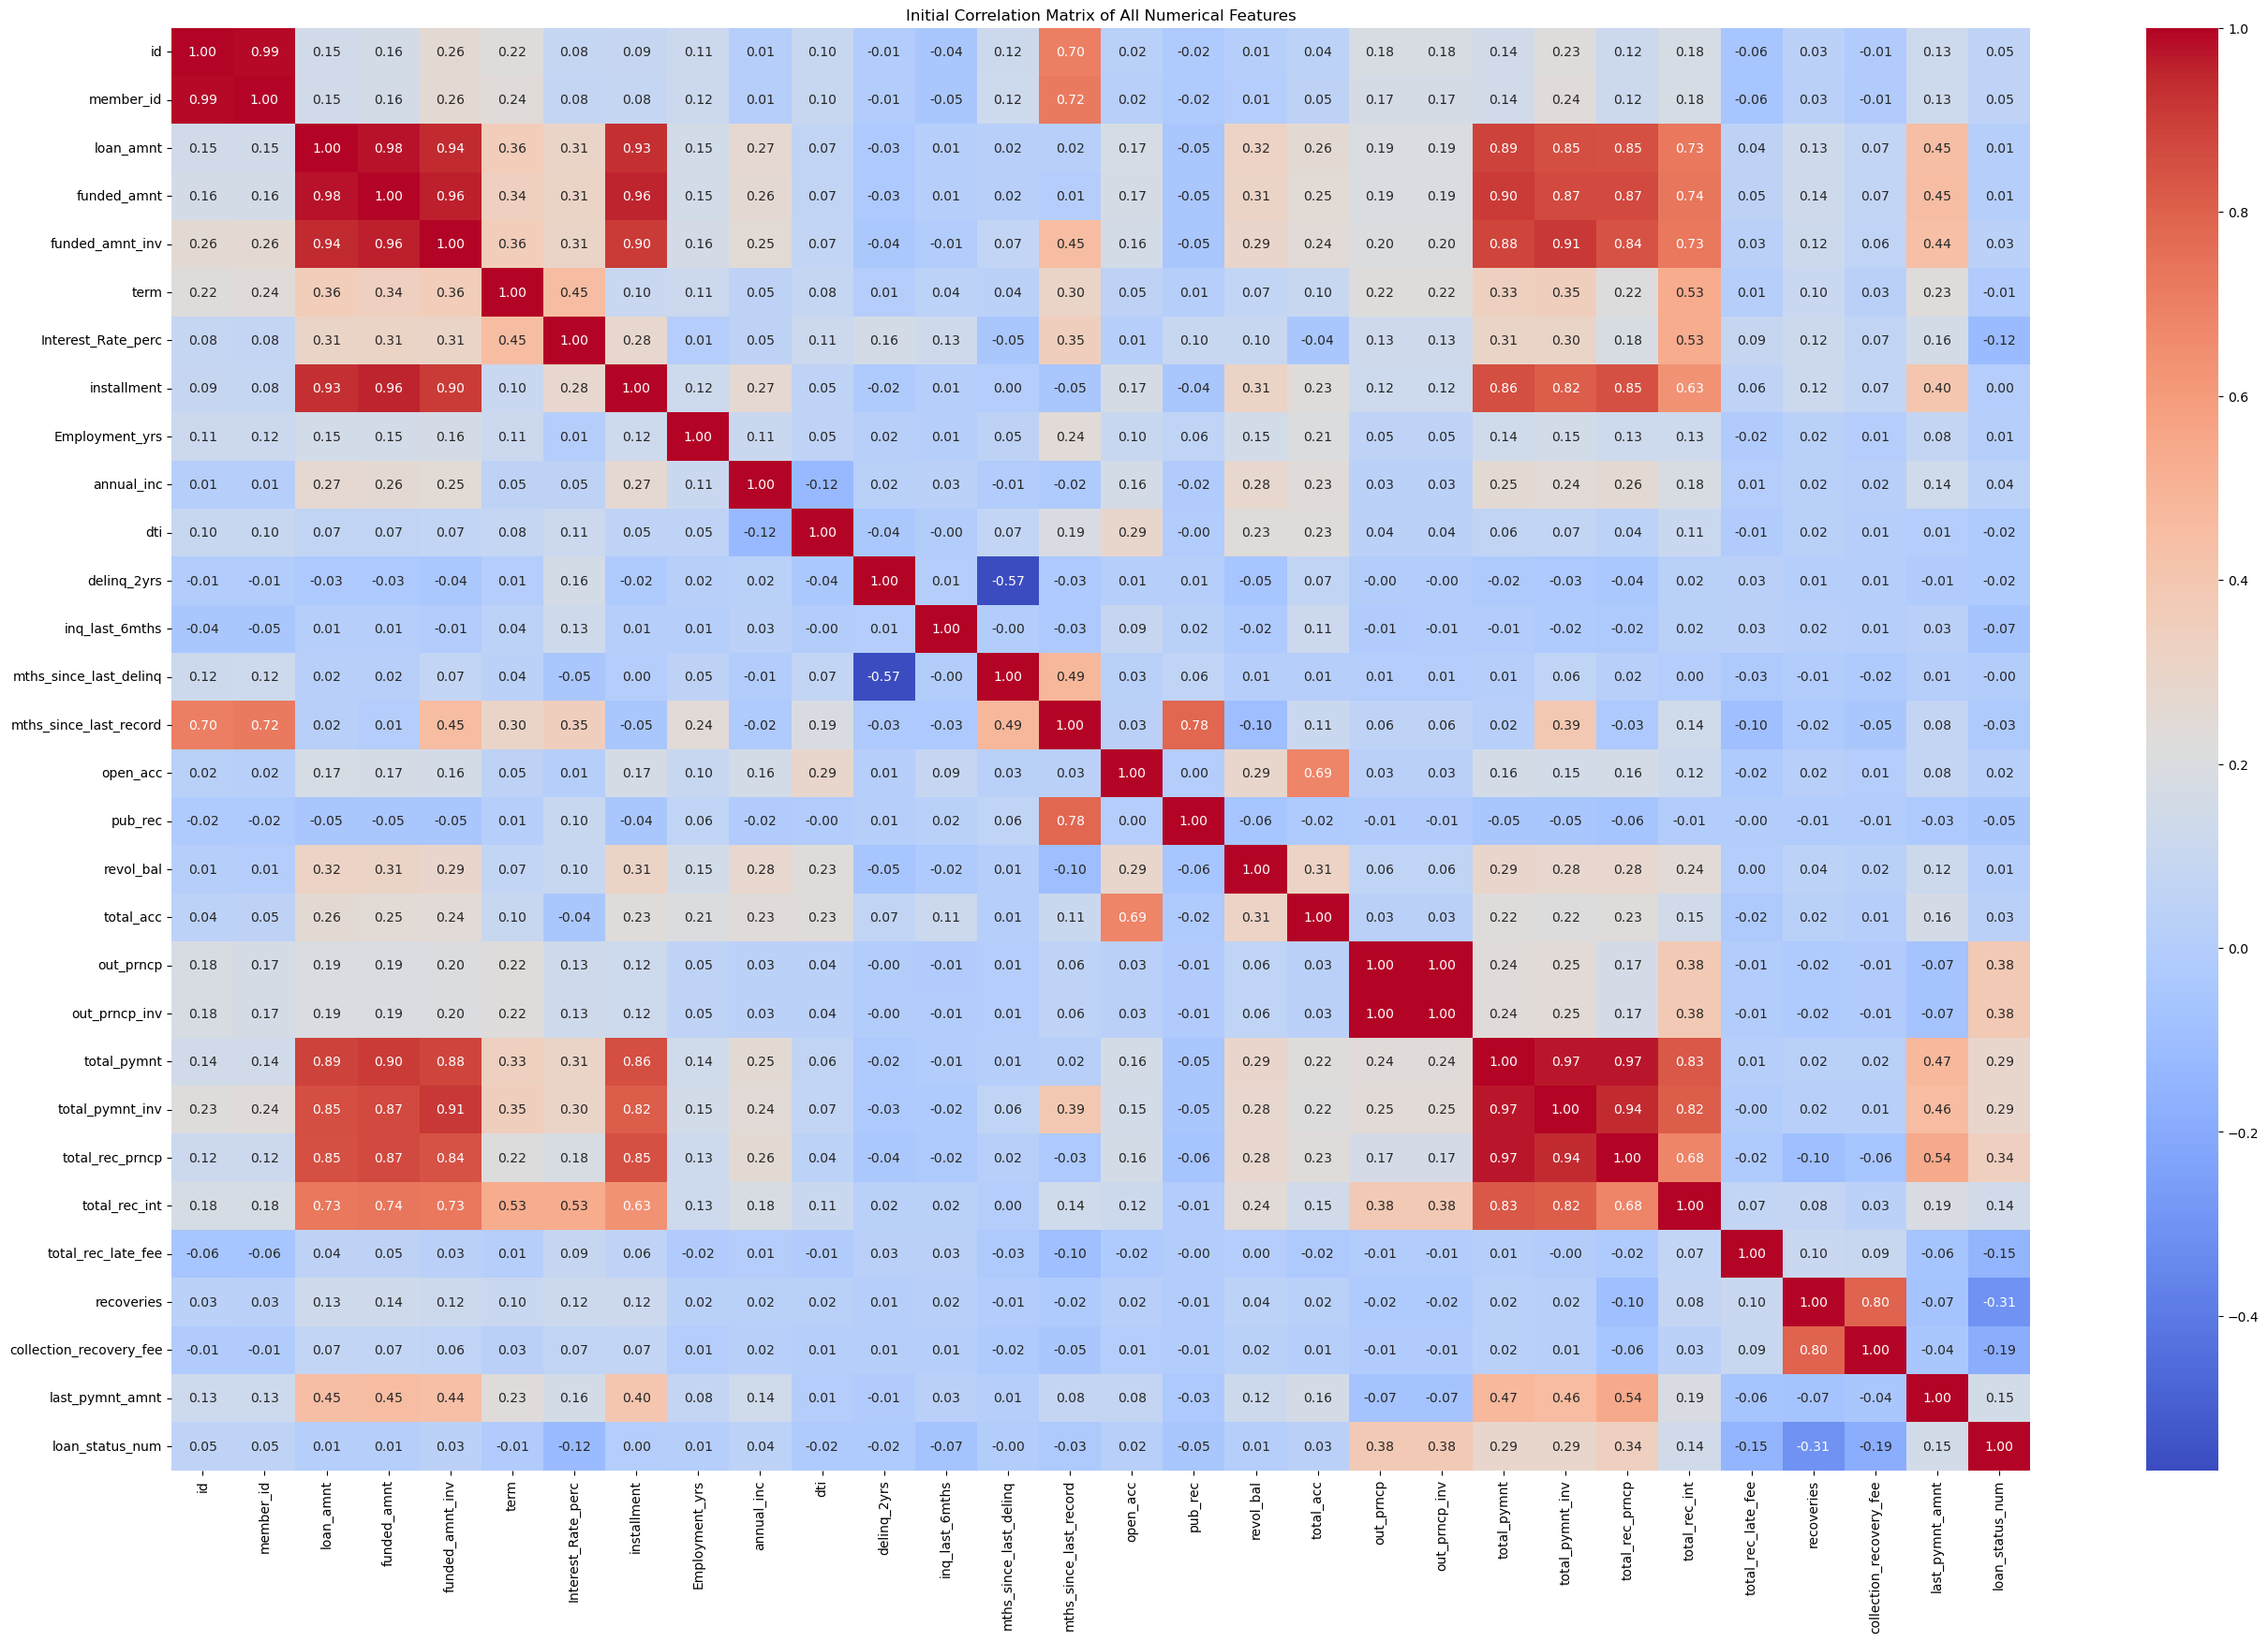

In [153]:
initial_correlation_matrix = loan_data.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(initial_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Formatting
plt.title("Initial Correlation Matrix of All Numerical Features")

# Show the plot
plt.show()

The heat map is the overview of the numerical variable relationships in the dataset. showing the correlation values for each if we see the summary from the map the laon amount is positively correlated with the installements and total payment expectaion with larger loans have higher monthly payments. and correlated with interest rates moderatively.  and the interest rate is positively correlated with DTI ratio showing the borrwers with hight debt to get higher interest rates. and negatively correlated with loan grade  where the interest rates higher for the low grades (E,F,G). and DTI negatively correlated with income where higher income borrowers are having low DTI ratios.